#  Assignment 3


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

### Generating Target Function

In [ ]:
w = np.array([-0.8, 0.85])
c = 0.025

def target_function(x, m=w, c=c):
  return np.sign(m.T @ x + c)

### Generating Random points

In [ ]:
def generate_data(n, f_range=(-1, 1)):
  X=[]
  for _ in range(n):
    x1 = np.random.uniform(f_range[0], f_range[1])
    x2 = np.random.uniform(f_range[0], f_range[1])
    x = np.array([x1, x2])
    label = target_function(x)
    X.append(np.array([x1,x2,label]))
  return np.array(X)


In [ ]:
X = generate_data(20)
X.shape

(20, 3)

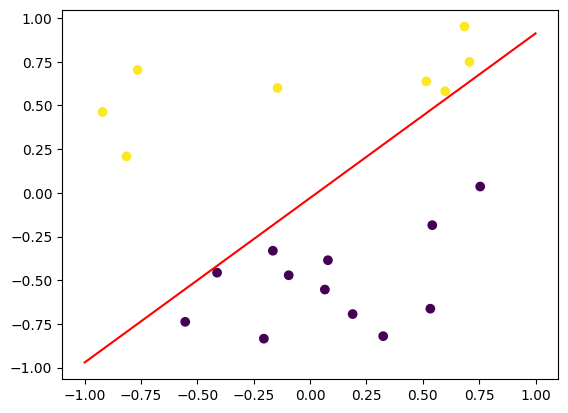

In [ ]:
x_values = np.linspace(-1, 1, 100)
y_values = (w[0] * x_values + c)* (-1/w[1])

plt.scatter(X[:,0],X[:,1],c=X[:, 2], cmap='viridis')
plt.plot(x_values, y_values, color='red')
plt.show()

In [ ]:
def perceptron_training(X, max_iter,learning_rate=0.1):
  start = time.time()
  wb_init = np.random.uniform(0,1, (1, X.shape[1]))
  wb_pred = wb_init
  for t in range(max_iter):
    w_tr = wb_pred[:,:2][0]
    b_tr = wb_pred[:,2:][0][0]
    if all(target_function(x[:2], m=w_tr,c=b_tr)==x[2:] for x in X):
      print("Iteration Taken = ",t)
      print("Time Taken = ",time.time() - start, "s")
      return wb_pred
    i = np.random.randint(0, len(X)-1)
    x = X[i,:2]
    y = X[i, 2:][0]
    y_pred = target_function(x, m=w_tr, c=b_tr)
    if y != y_pred:
      temp_w = w_tr + learning_rate *( y - y_pred)*x
      temp_b = b_tr + learning_rate * (y- y_pred)
      wb_pred[0]=np.array([temp_w[0], temp_w[1], temp_b])
  return wb_pred

In [ ]:
pred_weight = perceptron_training(X,5000,0.001)

In [ ]:
w_pred = pred_weight.flatten()

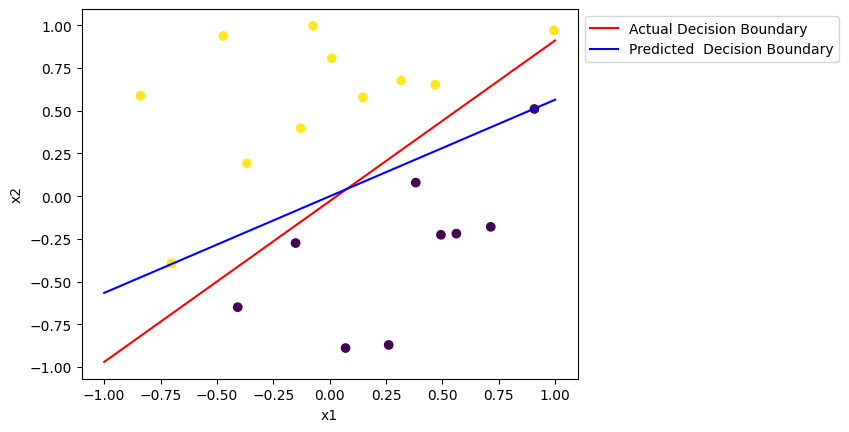

In [ ]:
x_values = np.linspace(-1, 1, 100)
y_values = (w[0] * x_values + c)* (-1/w[1])

y_values_pred = (w_pred[0] * x_values + w_pred[2])* (-1/w_pred[1])

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[:,0],X[:,1],c=X[:, 2], cmap='viridis')
plt.plot(x_values, y_values, color='red', label="Actual Decision Boundary")
plt.plot(x_values, y_values_pred, color='blue', label="Predicted  Decision Boundary")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Training on 1000 Data Points

In [ ]:
X = generate_data(1000)
X.shape

(1000, 3)

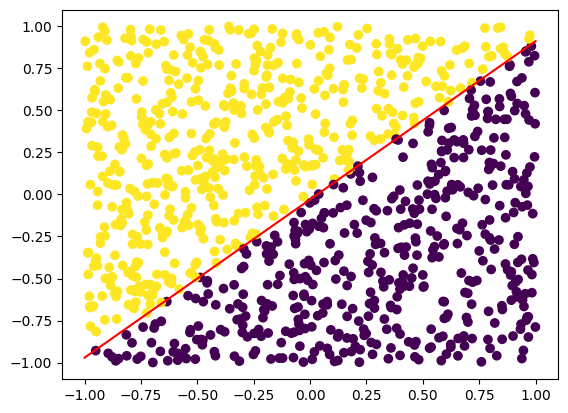

In [ ]:
x_values = np.linspace(-1, 1, 100)
y_values = (w[0] * x_values + c)* (-1/w[1])

plt.scatter(X[:,0],X[:,1],c=X[:, 2], cmap='viridis')
plt.plot(x_values, y_values, color='red')
plt.show()

In [ ]:
pred_weight = perceptron_training(X,100000,0.01)

Iteration Taken =  52965
Time Taken =  29.100056648254395 s


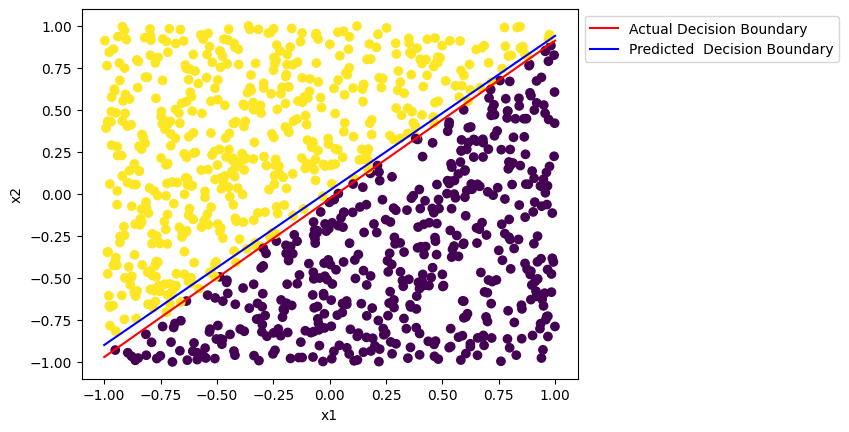

In [ ]:
# Define the decision boundary
x_values = np.linspace(-1, 1, 100)
y_values = (w[0] * x_values + c)* (-1/w[1])

y_values_pred = (w_pred[2] * x_values + w_pred[1])* (-1/w_pred[0])

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[:,0],X[:,1],c=X[:, 2], cmap='viridis')
plt.plot(x_values, y_values, color='red', label="Actual Decision Boundary")
plt.plot(x_values, y_values_pred, color='blue', label="Predicted  Decision Boundary")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

weights = []
iterations_list = []


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def predict_one_vs_all(X, weights):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    predictions = np.dot(X_bias, np.array(weights).T)
    return np.argmax(predictions, axis=1)
def perceptron_sgd(X, y, learning_rate=0.01, max_iter=10000):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    w = np.zeros(X_bias.shape[1])
    for _ in range(max_iter):
        for i in range(len(X)):
            if np.sign(np.dot(X_bias[i], w)) != y[i]:
                w += learning_rate * y[i] * X_bias[i]
    return w

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weights_optimized = []

for class_index in range(3):
    y_train_binary = np.where(y_train == class_index, 1, -1)
    w_optimized = perceptron_sgd(X_train_scaled, y_train_binary)
    weights_optimized.append(w_optimized)

y_pred_optimized = predict_one_vs_all(X_test_scaled, weights_optimized)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

accuracy_optimized

0.9666666666666667